##  COMP24112 Lab 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To handle the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [12]:
print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [13]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [14]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [15]:
print(labels[i])

0


For instance, by running

In [16]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [17]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [18]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [184 364 331 597 456 511 773 616 743 758]
Samples:   (0, 2)	1
  (0, 5)	2
  (0, 13)	1
  (0, 21)	2
  (0, 30)	1
  (0, 33)	1
  (0, 44)	1
  (0, 73)	1
  (0, 103)	1
  (0, 105)	1
  (0, 171)	1
  (0, 186)	1
  (0, 205)	3
  (0, 236)	1
  (0, 360)	1
  (0, 397)	1
  (0, 563)	1
  (0, 686)	1
  (0, 712)	1
  (0, 1048)	1
  (0, 1464)	1
  (0, 1483)	1
  (0, 1512)	1
  (0, 1839)	1
  (0, 1858)	1
  :	:
  (8, 271)	2
  (8, 332)	2
  (8, 340)	2
  (8, 485)	1
  (8, 814)	1
  (8, 984)	1
  (8, 1229)	2
  (8, 1539)	1
  (8, 1588)	1
  (8, 3165)	2
  (8, 4812)	1
  (9, 5)	1
  (9, 13)	1
  (9, 98)	1
  (9, 99)	1
  (9, 215)	1
  (9, 240)	1
  (9, 332)	3
  (9, 340)	2
  (9, 703)	1
  (9, 814)	1
  (9, 984)	2
  (9, 1229)	2
  (9, 3825)	2
  (9, 6403)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you are allowed to use the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

In [19]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = pairwise_distance.argsort()[:,:k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    return (np.array(scipy.stats.mode(nearest_labels, axis=1)[0])).squeeze()

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.

Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies. Print out the mean and standard deviation.

In [48]:
from sklearn.metrics import accuracy_score

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

accuracy = []

for _ in range(20):
    training_indices = sample_indices(labels, 80, 80, 80, 80)

    testing_indices = np.arange(len(labels))
    testing_indices = np.delete(testing_indices, training_indices)

    training_data = data[training_indices]
    testing_data = data[testing_indices]

    training_labels = labels[training_indices]
    testing_labels = labels[testing_indices]

    predicted = knn_classify(testing_data, training_data, training_labels, metric="euclidean", k=3)

    accuracy.append(accuracy_score(testing_labels, predicted))


print("Euclidean")
print("Mean: %a" % (np.mean(accuracy)))
print("Standard deviation: %a" % (np.std(accuracy)))

Euclidean
Mean: 0.8794791666666667
Standard deviation: 0.01796112458972928


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

Print out the mean and standard deviation.

In [52]:
accuracy = []

for _ in range(20):
    training_indices = sample_indices(labels, 80, 80, 80, 80)

    testing_indices = np.arange(len(labels))
    testing_indices = np.delete(testing_indices, training_indices)

    training_data = data[training_indices]
    testing_data = data[testing_indices]

    training_labels = labels[training_indices]
    testing_labels = labels[testing_indices]

    predicted = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=3)

    accuracy.append(accuracy_score(testing_labels, predicted))


print("Cosine")
print("Mean: %a" % (np.mean(accuracy)))
print("Standard deviation: %a" % (np.std(accuracy)))

Cosine
Mean: 0.9573958333333336
Standard deviation: 0.00875185992137291


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better in Experiment 1.

Randomly select 80 articles per class for training, and use the remaining articles for testing. Train your k-NN classifier with the neighbour number $k$ varying from 1 to 50.

For each values of $k$, repeat the training process by 20 trials and record the average training error rates and standard deviation.

Do the same for testing errors.

In [22]:
standard_deviation_training = []
standard_deviation_testing = []
error_rates_training = []
error_rates_testing = []

for k in range(1, 51):
    accuracy_training = []
    accuracy_testing = []
    
    for _ in range(20):
        training_indices = sample_indices(labels, 80, 80, 80, 80)

        testing_indices = np.arange(len(labels))
        testing_indices = np.delete(testing_indices, training_indices)

        training_data = data[training_indices]
        testing_data = data[testing_indices]

        training_labels = labels[training_indices]
        testing_labels = labels[testing_indices]

        predicted_testing = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=k)
        predicted_training = knn_classify(training_data, training_data, training_labels, metric="cosine", k=k)
        
        accuracy_training.append(accuracy_score(training_labels, predicted_training))
        accuracy_testing.append(accuracy_score(testing_labels, predicted_testing))
        
    standard_deviation_training.append(np.std(accuracy_training))
    standard_deviation_testing.append(np.std(accuracy_testing))
    
    error_rates_training.append(np.mean(1 - np.average(accuracy_training)))
    error_rates_testing.append(np.mean(1 - np.average(accuracy_testing)))
    
    
    
for k in range(0,50):
    print("TRAINING: for k = %a" % (k+1))
    print("Standard deviation: %a" % (standard_deviation_training[k]))
    print("Average error rates: %a" % (error_rates_training[k]))
    print()
for k in range(0,50):
    print("TESTING: for k = %a" % (k+1))
    print("Standard deviation: %a" % (standard_deviation_testing[k]))
    print("Average error rates: %a" % (error_rates_testing[k]))
    print()

TRAINING: for k = 1
Standard deviation: 0.0
Average error rates: 0.0

TRAINING: for k = 2
Standard deviation: 0.007413235102672773
Average error rates: 0.015156250000000093

TRAINING: for k = 3
Standard deviation: 0.007818747501998007
Average error rates: 0.015000000000000013

TRAINING: for k = 4
Standard deviation: 0.00664935088467289
Average error rates: 0.019218750000000062

TRAINING: for k = 5
Standard deviation: 0.009178939464202826
Average error rates: 0.024531250000000115

TRAINING: for k = 6
Standard deviation: 0.00816546414403371
Average error rates: 0.02921874999999985

TRAINING: for k = 7
Standard deviation: 0.008260587429928927
Average error rates: 0.027343750000000222

TRAINING: for k = 8
Standard deviation: 0.008516700046819778
Average error rates: 0.03171875000000013

TRAINING: for k = 9
Standard deviation: 0.008630602799775927
Average error rates: 0.028593749999999973

TRAINING: for k = 10
Standard deviation: 0.009337163230205415
Average error rates: 0.03859374999999987

Produce an error bar plot showing the training error rate for each $k$ here:

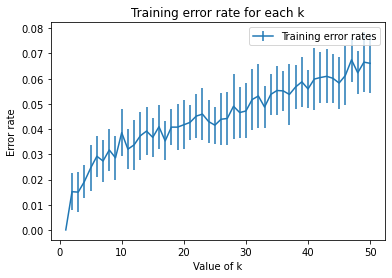

In [23]:
k = np.arange(1, 51)
plt.title('Training error rate for each k')
plt.xlabel('Value of k')
plt.ylabel('Error rate')
plt.errorbar(k, error_rates_training, yerr = standard_deviation_training,  label = 'Training error rates')
plt.legend()
plt.show()

Produce your testing error bar plot here:

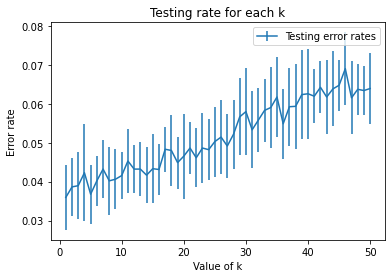

In [24]:
plt.title('Testing rate for each k')
plt.xlabel('Value of k')
plt.ylabel('Error rate')
plt.errorbar(k, error_rates_testing, yerr = standard_deviation_testing, label = 'Testing error rates')
plt.legend()
plt.show()

**Remember that all graphs should have axis labels and a title.**

### Experiment 3

Compare three 5-NN classifiers using cosine distance.

First, randomly select 100 articles per class and keep these as your testing samples. Set all the remaining articles as the training set.

In [25]:
testing_indices = sample_indices(labels, 100, 100, 100, 100)

training_indices = np.arange(len(labels))
training_indices = np.delete(training_indices, testing_indices)

testing_data = data[testing_indices]
training_data = data[training_indices]

testing_labels = labels[testing_indices]
training_labels = labels[training_indices]

Then do the following:

(1) Train the first classifier using the traning set.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

"Print out the numbers of the training and testing samples belonging to each class, the 2×2 confusion matrix for each of the 4 classes, and the overall accuracy of the classifier."

In [26]:
from sklearn.metrics import multilabel_confusion_matrix

predicted = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=5)

print("The numbers of the training and testing samples belonging to each class are:")
print(np.bincount(predicted))
print()
print("Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:")
print(np.rot90(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3])[0], 2))
print()
print(np.rot90(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3])[1], 2))
print()
print(np.rot90(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3])[2], 2))
print()
print(np.rot90(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3])[3], 2))
print()
accuracy = accuracy_score(testing_labels, predicted)
print("Accuracy of the classifier is %a" % (accuracy))

The numbers of the training and testing samples belonging to each class are:
[101 102  99  98]

Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:
[[ 97   3]
 [  4 296]]

[[ 98   2]
 [  4 296]]

[[ 93   7]
 [  6 294]]

[[ 95   5]
 [  3 297]]

Accuracy of the classifier is 0.9575


(2) Randomly remove 95 training articles from class 1 ("crude") of the training set.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

In [27]:
from random import sample
random_numbers = sample(range(100, 200), 95)


new_training_indices = np.delete(training_indices, random_numbers)

new_training_labels = labels[new_training_indices]

new_training_data = data[new_training_indices]

predicted = knn_classify(testing_data, new_training_data, new_training_labels, metric="cosine", k=5)


print("The numbers of the training and testing samples belonging to each class are:")
print(np.bincount(predicted))
print()
print("Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:")
print(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3]))
print()
accuracy = accuracy_score(testing_labels, predicted)
print("Accuracy of the classifier is %a" % (accuracy))

The numbers of the training and testing samples belonging to each class are:
[127  35 124 114]

Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:
[[[270  30]
  [  3  97]]

 [[300   0]
  [ 65  35]]

 [[269  31]
  [  7  93]]

 [[284  16]
  [  2  98]]]

Accuracy of the classifier is 0.8075


(3) Randomly remove 95 training articles from *all* the classes of the training set.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

Print out the label distribution, 4 confusion matrices, and the accuracy of the classifier.

In [28]:
from random import sample
random_class_0 = sample(range(0, 100), 95)
random_class_1 = sample(range(100, 200), 95)
random_class_2 = sample(range(200, 300), 95)
random_class_3 = sample(range(300, 400), 95)
random_numbers = random_class_0 + random_class_1 + random_class_2 + random_class_3

new_training_indices = np.delete(training_indices, random_numbers)

new_training_labels = labels[new_training_indices]

new_training_data = data[new_training_indices]

predicted = knn_classify(testing_data, new_training_data, new_training_labels, metric="cosine", k=5)

print("The numbers of the training and testing samples belonging to each class are:")
print(np.bincount(predicted))
print()
print("Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:")
print(multilabel_confusion_matrix(testing_labels, predicted, labels=[0, 1, 2, 3]))
print()
accuracy = accuracy_score(testing_labels, predicted)
print("Accuracy of the classifier is %a" % (accuracy))

The numbers of the training and testing samples belonging to each class are:
[ 91  94 120  95]

Confusion matrix for each of the 4 classes (0, 1, 2, 3) are:
[[[292   8]
  [ 17  83]]

 [[295   5]
  [ 11  89]]

 [[273  27]
  [  7  93]]

 [[291   9]
  [ 14  86]]]

Accuracy of the classifier is 0.8775


Repeat the whole thing a few times.
Which of the three classifiers performs the worst?

## 5. Result Analysis 

### Analysis 1
Choose a training-testing trial in Experiment 2 for k=1. Observe the testing error of this 1-NN, and estimate the interval where its true error lies with 90% probability. Explain how you compute it below.

In [29]:
from math import sqrt
error_s = error_rates_testing[0]
a = 1.64 * (sqrt((error_s*(1-error_s))/480))
# 480 being the number of testing samples
lower_bound = error_s - a
upper_bound = error_s + a
print("The interval is:")
print("[%a  <=  %a  <=  %a]" % (lower_bound, error_s, upper_bound))

The interval is:
[0.02200433579445621  <=  0.035937499999999956  <=  0.0498706642055437]


### Analysis 2
The following function `Get_p_value()` is provided to obtain $p$ according to $z_p$. Use this function to perform Analysis 2.

In [30]:
# run this cell first

def Get_p_value(zp):
    return round(1 - scipy.stats.norm.sf(abs(zp))*2,2)

In [31]:
# Use this cell to compare the output value of function Get_p_value with 
# the table provided in your lecture notes (e.g., Slide 12, Chapter3C.pdf)

print('zp = 0.67, p = ', Get_p_value(0.67))
print('zp = 1, p = ', Get_p_value(1))
print('zp = 1.64, p = ', Get_p_value(1.64))
print('zp = 2.58, p = ', Get_p_value(2.58))
print()

# you can alert the input zp value and re-run this cell to help you to calculate the corresponding p.
print('p = ', Get_p_value(0.43))  


# you can change 0.43 to any zp value you obtained.

zp = 0.67, p =  0.5
zp = 1, p =  0.68
zp = 1.64, p =  0.9
zp = 2.58, p =  0.99

p =  0.33


Choose a training-testing trial in Experiment 2 for k=45. Observe the testing error of this 45-NN. Compare it with the 1-NN in Analysis 1. Which one has higher testing sample error? Estimate the probability that it also has higher true error. Explain how you compute it below.  

In [32]:
error_k1 = error_rates_testing[0]
error_k45 = error_rates_testing[44]
print("Testing sample error for k = 1: %a" % (error_k1))
print("Testing sample error for k = 45: %a" % (error_k45))

d = error_k45 - error_k1
sigma = sqrt((error_k45 * (1-error_k45))/480 + (error_k1 * (1-error_k1))/480)
# 480 being the number of testing samples
zp = d/sigma

p = Get_p_value(zp)

C = 1 - (1-p)/2

print("The probability is %a" % (C))

Testing sample error for k = 1: 0.035937499999999956
Testing sample error for k = 45: 0.06479166666666691
The probability is 0.98


### Analysis 3

Finally, observe and reflect on all the results you have obtained in each experiment, and try to intepret them using your machine learning knowledge. Be ready to answer the questions asked by GTA in your face-to-face marking, regarding to your results, implementation, as well as analysis and interpretation of your results.